In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [16]:
X_train = np.linspace(0, 1, 500)
X_test = np.linspace(0, 1, 1000)
#X = np.linspace(0, 1, 1500)
@np.vectorize
def target(x):
    return x > 0.5
y_train = target(X_train) + np.random.randn(*X_train.shape) * 0.1
#y = target(X) + np.random.randn(*X.shape) * 0.1

In [17]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.66, random_state=42, shuffle=True)

Text(0.5,1,'Two group random distribution')

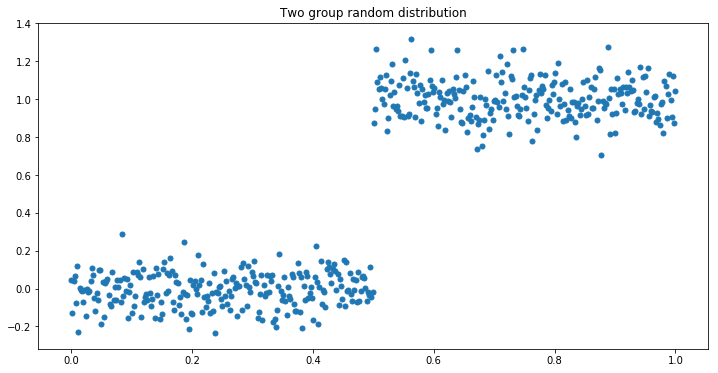

In [18]:
plt.figure(figsize=(12, 6))
plt.scatter(X, y, s = 25)
plt.title('Two group random distribution')

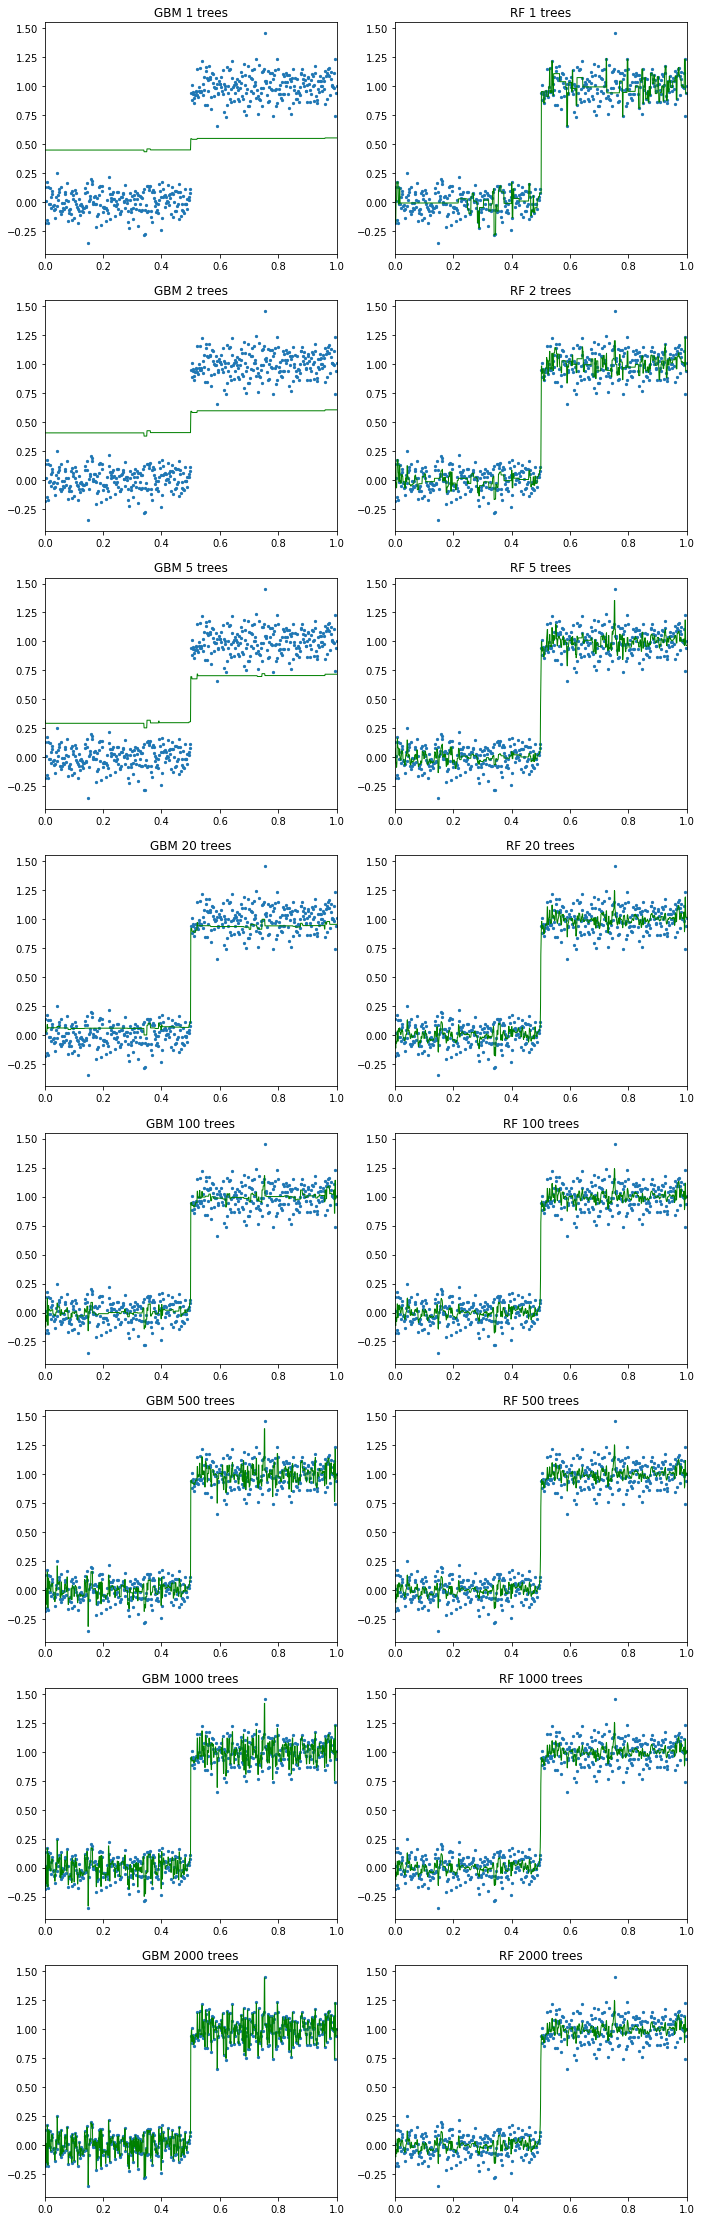

In [19]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

rf = RandomForestRegressor(max_depth=10, warm_start=True, verbose=0)
gbm = GradientBoostingRegressor(warm_start=True, verbose=0)

#X_train = X_train.reshape(-1, 1)
plt.figure(figsize=(11.5, 40))

est_list = [1, 2, 5, 20, 100, 500, 1000, 2000]

for idx, est in  enumerate(est_list):
    gbm.n_estimators = est
    gbm.fit(X_train.reshape(-1, 1), y_train)
    
    rf.n_estimators = est
    rf.fit(X_train.reshape(-1, 1), y_train)   
   
    plt.subplot(8, 2, 2 * idx + 1)
    plt.xlim([0, 1])
    plt.scatter(X_train, y_train, s = 5)      
    plt.plot(X_test, gbm.predict(X_test.reshape(-1, 1)), c='green', linewidth=1)
    plt.title('GBM {} trees'.format(est))
    
    plt.subplot(8, 2, 2 * idx + 2)
    plt.xlim([0, 1])
    plt.scatter(X_train, y_train, s = 5)
    plt.plot(X_test, rf.predict(X_test.reshape(-1, 1)), c='green', linewidth=1)
    plt.title('RF {} trees'.format(est))   